In [1]:
import pandas as pd
import numpy as np
print(np.__version__)
print(pd.__version__)

In [ ]:
data = pd.read_csv('/mnt/c/users/renos/Desktop/olympic_events.csv')

In [2]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
a = len(data)
print('dataframe has',a,'records\n')

col = data.columns
print('dataframe has', len(col),'columns. The column headers are:\n\n', list(data))

#print('The column headers are', list(data))

dataframe has 271116 records

dataframe has 15 columns. The column headers are:

 ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [4]:
athlete = data.set_index('Name')
#athlete.head()

In [5]:
na_all_rows = athlete[athlete.isna().any(axis=1)]
len(na_all_rows)

240935

In [6]:
no_medal = athlete[athlete['Medal'].isna()]  #col name case-sens
print("number of athletes who did not win a medal: ",len(no_medal))
no_medal_removed = len(athlete) - len(no_medal)
print("number of athletes who did win a medal:", no_medal_removed)

number of athletes who did not win a medal:  231333
number of athletes who did win a medal: 39783


In [7]:
no_gender = athlete[athlete['Sex'].isna()]
print(len(no_gender))

gender_count = athlete.groupby(['Sex'])['Sex'].count()
gender_count

0


Sex
F     74522
M    196594
Name: Sex, dtype: int64

In [8]:
gender_team = pd.DataFrame(athlete.groupby(['Sex','Team']).size().reset_index(name = "count"))
gender_team

,Sex,Team,count
0,F,Afghanistan,5
1,F,Albania,27
2,F,Algeria,94
3,F,American Samoa,7
4,F,Ancora,1
...,...,...,...
1523,M,Zambia,164
1524,M,Zefyros,2
1525,M,Zimbabwe,196
1526,M,Zut,3


In [25]:
grouped_1 = gender_team.groupby(gender_team.Sex)
grouped_f = grouped_1.get_group("F")
grouped_f

,Sex,Team,count
0,F,Afghanistan,5
1,F,Albania,27
2,F,Algeria,94
3,F,American Samoa,7
4,F,Ancora,1
...,...,...,...
369,F,West Germany-3,1
370,F,Yemen,4
371,F,Yugoslavia,378
372,F,Zambia,19


In [26]:
grouped_2 = gender_team.groupby(gender_team.Sex)
grouped_m = grouped_1.get_group("M")
grouped_m

,Sex,Team,count
374,M,30. Februar,2
375,M,A North American Team,4
376,M,Acipactli,3
377,M,Acturus,2
378,M,Afghanistan,121
...,...,...,...
1523,M,Zambia,164
1524,M,Zefyros,2
1525,M,Zimbabwe,196
1526,M,Zut,3


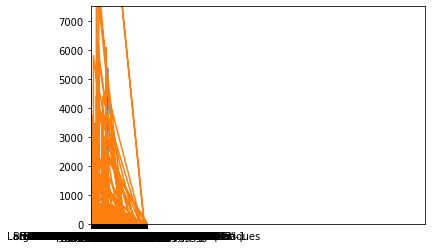

In [36]:
fig = mpl.figure()

for frame in [grouped_f,grouped_m]:
    mpl.plot(frame['Team'],frame['count'])

mpl.xlim(0,7000)
mpl.ylim(0,7500)
mpl.show()

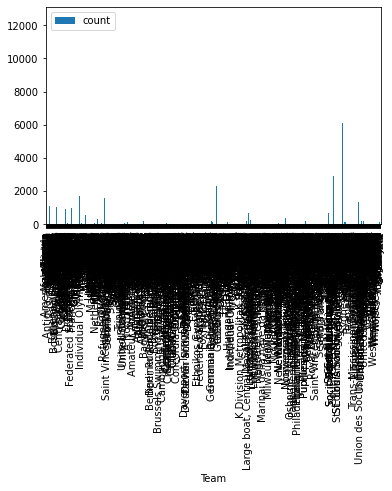

In [23]:
import matplotlib.pyplot as mpl
dataFrame=pd.DataFrame(gender_team, columns=["Team","Sex","count"])
dataFrame.plot(x="Team",y=["Sex","count"], kind="bar")
mpl.show()


In [11]:
no_team =athlete[athlete['Team'].isna()]
print(len(no_team))

0


In [13]:
import pandas as pd
pd.__version__

'1.4.1'